# DIOMIRA Kublai

## Running DIOMIRA Script

In [61]:
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cProfile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time

In [63]:
%matplotlib inline

In [64]:
import mplFunctions as mpl
import wfmFunctions as wfm

In [65]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

### DIOMIRA_K revisited in:

In [66]:
print(time.strftime("%d/%m/%Y"))

01/10/2016


In [67]:
print(time.strftime("%H:%M:%S"))

16:19:40


## Running Diomira over preproc Kr file

In [11]:
%less ../../Config/DIOMIRA_NA_ZLIB_test.csv

In [12]:
%time %run ../../Cities/DIOMIRA.py -c ../../Config/DIOMIRA_NA_ZLIB_test.csv 

Debug level = INFO
input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/test/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =nexus_NEW_NEXT_v0_08_00_Kr_ACTIVE_5bar_1000kev_0.next_10000.root.h5 file_out =Kr_ACTIVE_5bar_evt_1000.h5
first event = 0 last event = 1000 nof events requested = 1000 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1789 nof events in input DST = 1000 
lof SiPM WF = 1200000 lof PMT WF (MC) = 1200 lof PMT WF (FEE) = 48000
INFO:root:-->event number =0


-->event number =0


INFO:root:-->event number =1


-->event number =1


INFO:root:-->event number =2


-->event number =2


INFO:root:-->event number =3


-->event number =3


INFO:root:-->event number =4


-->event number =4


INFO:root:-->event number =5


-->event number =5


INFO:root:-->event number =6


-->event number =6


INFO:root:-->event number =7


-->event number =7


INFO:root:-->event number =8


-->event number =8


INFO:root:-->event number =9


-->event number =9


INFO:root:-->event number =10


-->event number =10


INFO:root:-->event number =11


-->event number =11


INFO:root:-->event number =12


-->event number =12


INFO:root:-->event number =13


-->event number =13


INFO:root:-->event number =14


-->event number =14


INFO:root:-->event number =15


-->event number =15


INFO:root:-->event number =16


-->event number =16


INFO:root:-->event number =17


-->event number =17


INFO:root:-->event number =18


-->event number =18


INFO:root:-->event number =19


-->event number =19


INFO:root:-->event number =20


-->event number =20


INFO:root:-->event number =21


-->event number =21


INFO:root:-->event number =22


-->event number =22


INFO:root:-->event number =23


-->event number =23


INFO:root:-->event number =24


-->event number =24


INFO:root:-->event number =25


-->event number =25


INFO:root:-->event number =26


-->event number =26


INFO:root:-->event number =27


-->event number =27


INFO:root:-->event number =28


-->event number =28


INFO:root:-->event number =29


-->event number =29


INFO:root:-->event number =30


-->event number =30


INFO:root:-->event number =31


-->event number =31


INFO:root:-->event number =32


-->event number =32


INFO:root:-->event number =33


-->event number =33


INFO:root:-->event number =34


-->event number =34


INFO:root:-->event number =35


-->event number =35


INFO:root:-->event number =36


-->event number =36


INFO:root:-->event number =37


-->event number =37


INFO:root:-->event number =38


-->event number =38


INFO:root:-->event number =39


-->event number =39


INFO:root:-->event number =40


-->event number =40


INFO:root:-->event number =41


-->event number =41


INFO:root:-->event number =42


-->event number =42


INFO:root:-->event number =43


-->event number =43


INFO:root:-->event number =44


-->event number =44


INFO:root:-->event number =45


-->event number =45


INFO:root:-->event number =46


-->event number =46


INFO:root:-->event number =47


-->event number =47


INFO:root:-->event number =48


-->event number =48


INFO:root:-->event number =49


-->event number =49


INFO:root:-->event number =50


-->event number =50


INFO:root:-->event number =51


-->event number =51


INFO:root:-->event number =52


-->event number =52


INFO:root:-->event number =53


-->event number =53


INFO:root:-->event number =54


-->event number =54


INFO:root:-->event number =55


-->event number =55


INFO:root:-->event number =56


-->event number =56


INFO:root:-->event number =57


-->event number =57


INFO:root:-->event number =58


-->event number =58


INFO:root:-->event number =59


-->event number =59


INFO:root:-->event number =60


-->event number =60


INFO:root:-->event number =61


-->event number =61


INFO:root:-->event number =62


-->event number =62


INFO:root:-->event number =63


-->event number =63


INFO:root:-->event number =64


-->event number =64


INFO:root:-->event number =65


-->event number =65


INFO:root:-->event number =66


-->event number =66


INFO:root:-->event number =67


-->event number =67


INFO:root:-->event number =68


-->event number =68


INFO:root:-->event number =69


-->event number =69


INFO:root:-->event number =70


-->event number =70


INFO:root:-->event number =71


-->event number =71


INFO:root:-->event number =72


-->event number =72


INFO:root:-->event number =73


-->event number =73


INFO:root:-->event number =74


-->event number =74


INFO:root:-->event number =75


-->event number =75


INFO:root:-->event number =76


-->event number =76


INFO:root:-->event number =77


-->event number =77


INFO:root:-->event number =78


-->event number =78


INFO:root:-->event number =79


-->event number =79


INFO:root:-->event number =80


-->event number =80


INFO:root:-->event number =81


-->event number =81


INFO:root:-->event number =82


-->event number =82


INFO:root:-->event number =83


-->event number =83


INFO:root:-->event number =84


-->event number =84


INFO:root:-->event number =85


-->event number =85


INFO:root:-->event number =86


-->event number =86


INFO:root:-->event number =87


-->event number =87


INFO:root:-->event number =88


-->event number =88


INFO:root:-->event number =89


-->event number =89


INFO:root:-->event number =90


-->event number =90


INFO:root:-->event number =91


-->event number =91


INFO:root:-->event number =92


-->event number =92


INFO:root:-->event number =93


-->event number =93


INFO:root:-->event number =94


-->event number =94


INFO:root:-->event number =95


-->event number =95


INFO:root:-->event number =96


-->event number =96


INFO:root:-->event number =97


-->event number =97


INFO:root:-->event number =98


-->event number =98


INFO:root:-->event number =99


-->event number =99


INFO:root:-->event number =100


-->event number =100


INFO:root:-->event number =101


-->event number =101


INFO:root:-->event number =102


-->event number =102


INFO:root:-->event number =103


-->event number =103


INFO:root:-->event number =104


-->event number =104


INFO:root:-->event number =105


-->event number =105


INFO:root:-->event number =106


-->event number =106


INFO:root:-->event number =107


-->event number =107


INFO:root:-->event number =108


-->event number =108


INFO:root:-->event number =109


-->event number =109


INFO:root:-->event number =110


-->event number =110


INFO:root:-->event number =111


-->event number =111


INFO:root:-->event number =112


-->event number =112


INFO:root:-->event number =113


-->event number =113


INFO:root:-->event number =114


-->event number =114


INFO:root:-->event number =115


-->event number =115


INFO:root:-->event number =116


-->event number =116


INFO:root:-->event number =117


-->event number =117


INFO:root:-->event number =118


-->event number =118


INFO:root:-->event number =119


-->event number =119


INFO:root:-->event number =120


-->event number =120


INFO:root:-->event number =121


-->event number =121


INFO:root:-->event number =122


-->event number =122


INFO:root:-->event number =123


-->event number =123


INFO:root:-->event number =124


-->event number =124


INFO:root:-->event number =125


-->event number =125


INFO:root:-->event number =126


-->event number =126


INFO:root:-->event number =127


-->event number =127


INFO:root:-->event number =128


-->event number =128


INFO:root:-->event number =129


-->event number =129


INFO:root:-->event number =130


-->event number =130


INFO:root:-->event number =131


-->event number =131


INFO:root:-->event number =132


-->event number =132


INFO:root:-->event number =133


-->event number =133


INFO:root:-->event number =134


-->event number =134


INFO:root:-->event number =135


-->event number =135


INFO:root:-->event number =136


-->event number =136


INFO:root:-->event number =137


-->event number =137


INFO:root:-->event number =138


-->event number =138


INFO:root:-->event number =139


-->event number =139


INFO:root:-->event number =140


-->event number =140


INFO:root:-->event number =141


-->event number =141


INFO:root:-->event number =142


-->event number =142


INFO:root:-->event number =143


-->event number =143


INFO:root:-->event number =144


-->event number =144


INFO:root:-->event number =145


-->event number =145


INFO:root:-->event number =146


-->event number =146


INFO:root:-->event number =147


-->event number =147


INFO:root:-->event number =148


-->event number =148


INFO:root:-->event number =149


-->event number =149


INFO:root:-->event number =150


-->event number =150


INFO:root:-->event number =151


-->event number =151


INFO:root:-->event number =152


-->event number =152


INFO:root:-->event number =153


-->event number =153


INFO:root:-->event number =154


-->event number =154


INFO:root:-->event number =155


-->event number =155


INFO:root:-->event number =156


-->event number =156


INFO:root:-->event number =157


-->event number =157


INFO:root:-->event number =158


-->event number =158


INFO:root:-->event number =159


-->event number =159


INFO:root:-->event number =160


-->event number =160


INFO:root:-->event number =161


-->event number =161


INFO:root:-->event number =162


-->event number =162


INFO:root:-->event number =163


-->event number =163


INFO:root:-->event number =164


-->event number =164


INFO:root:-->event number =165


-->event number =165


INFO:root:-->event number =166


-->event number =166


INFO:root:-->event number =167


-->event number =167


INFO:root:-->event number =168


-->event number =168


INFO:root:-->event number =169


-->event number =169


INFO:root:-->event number =170


-->event number =170


INFO:root:-->event number =171


-->event number =171


INFO:root:-->event number =172


-->event number =172


INFO:root:-->event number =173


-->event number =173


INFO:root:-->event number =174


-->event number =174


INFO:root:-->event number =175


-->event number =175


INFO:root:-->event number =176


-->event number =176


INFO:root:-->event number =177


-->event number =177


INFO:root:-->event number =178


-->event number =178


INFO:root:-->event number =179


-->event number =179


INFO:root:-->event number =180


-->event number =180


INFO:root:-->event number =181


-->event number =181


INFO:root:-->event number =182


-->event number =182


INFO:root:-->event number =183


-->event number =183


INFO:root:-->event number =184


-->event number =184


INFO:root:-->event number =185


-->event number =185


INFO:root:-->event number =186


-->event number =186


INFO:root:-->event number =187


-->event number =187


INFO:root:-->event number =188


-->event number =188


INFO:root:-->event number =189


-->event number =189


INFO:root:-->event number =190


-->event number =190


INFO:root:-->event number =191


-->event number =191


INFO:root:-->event number =192


-->event number =192


INFO:root:-->event number =193


-->event number =193


INFO:root:-->event number =194


-->event number =194


INFO:root:-->event number =195


-->event number =195


INFO:root:-->event number =196


-->event number =196


INFO:root:-->event number =197


-->event number =197


INFO:root:-->event number =198


-->event number =198


INFO:root:-->event number =199


-->event number =199


INFO:root:-->event number =200


-->event number =200


INFO:root:-->event number =201


-->event number =201


INFO:root:-->event number =202


-->event number =202


INFO:root:-->event number =203


-->event number =203


INFO:root:-->event number =204


-->event number =204


INFO:root:-->event number =205


-->event number =205


INFO:root:-->event number =206


-->event number =206


INFO:root:-->event number =207


-->event number =207


INFO:root:-->event number =208


-->event number =208


INFO:root:-->event number =209


-->event number =209


INFO:root:-->event number =210


-->event number =210


INFO:root:-->event number =211


-->event number =211


INFO:root:-->event number =212


-->event number =212


INFO:root:-->event number =213


-->event number =213


INFO:root:-->event number =214


-->event number =214


INFO:root:-->event number =215


-->event number =215


INFO:root:-->event number =216


-->event number =216


INFO:root:-->event number =217


-->event number =217


INFO:root:-->event number =218


-->event number =218


INFO:root:-->event number =219


-->event number =219


INFO:root:-->event number =220


-->event number =220


INFO:root:-->event number =221


-->event number =221


INFO:root:-->event number =222


-->event number =222


INFO:root:-->event number =223


-->event number =223


INFO:root:-->event number =224


-->event number =224


INFO:root:-->event number =225


-->event number =225


INFO:root:-->event number =226


-->event number =226


INFO:root:-->event number =227


-->event number =227


INFO:root:-->event number =228


-->event number =228


INFO:root:-->event number =229


-->event number =229


INFO:root:-->event number =230


-->event number =230


INFO:root:-->event number =231


-->event number =231


INFO:root:-->event number =232


-->event number =232


INFO:root:-->event number =233


-->event number =233


INFO:root:-->event number =234


-->event number =234


INFO:root:-->event number =235


-->event number =235


INFO:root:-->event number =236


-->event number =236


INFO:root:-->event number =237


-->event number =237


INFO:root:-->event number =238


-->event number =238


INFO:root:-->event number =239


-->event number =239


INFO:root:-->event number =240


-->event number =240


INFO:root:-->event number =241


-->event number =241


INFO:root:-->event number =242


-->event number =242


INFO:root:-->event number =243


-->event number =243


INFO:root:-->event number =244


-->event number =244


INFO:root:-->event number =245


-->event number =245


INFO:root:-->event number =246


-->event number =246


INFO:root:-->event number =247


-->event number =247


INFO:root:-->event number =248


-->event number =248


INFO:root:-->event number =249


-->event number =249


INFO:root:-->event number =250


-->event number =250


INFO:root:-->event number =251


-->event number =251


INFO:root:-->event number =252


-->event number =252


INFO:root:-->event number =253


-->event number =253


INFO:root:-->event number =254


-->event number =254


INFO:root:-->event number =255


-->event number =255


INFO:root:-->event number =256


-->event number =256


INFO:root:-->event number =257


-->event number =257


INFO:root:-->event number =258


-->event number =258


INFO:root:-->event number =259


-->event number =259


INFO:root:-->event number =260


-->event number =260


INFO:root:-->event number =261


-->event number =261


INFO:root:-->event number =262


-->event number =262


INFO:root:-->event number =263


-->event number =263


INFO:root:-->event number =264


-->event number =264


INFO:root:-->event number =265


-->event number =265


INFO:root:-->event number =266


-->event number =266


INFO:root:-->event number =267


-->event number =267


INFO:root:-->event number =268


-->event number =268


INFO:root:-->event number =269


-->event number =269


INFO:root:-->event number =270


-->event number =270


INFO:root:-->event number =271


-->event number =271


INFO:root:-->event number =272


-->event number =272


INFO:root:-->event number =273


-->event number =273


INFO:root:-->event number =274


-->event number =274


INFO:root:-->event number =275


-->event number =275


INFO:root:-->event number =276


-->event number =276


INFO:root:-->event number =277


-->event number =277


INFO:root:-->event number =278


-->event number =278


INFO:root:-->event number =279


-->event number =279


INFO:root:-->event number =280


-->event number =280


INFO:root:-->event number =281


-->event number =281


INFO:root:-->event number =282


-->event number =282


INFO:root:-->event number =283


-->event number =283


INFO:root:-->event number =284


-->event number =284


INFO:root:-->event number =285


-->event number =285


INFO:root:-->event number =286


-->event number =286


INFO:root:-->event number =287


-->event number =287


INFO:root:-->event number =288


-->event number =288


INFO:root:-->event number =289


-->event number =289


INFO:root:-->event number =290


-->event number =290


INFO:root:-->event number =291


-->event number =291


INFO:root:-->event number =292


-->event number =292


INFO:root:-->event number =293


-->event number =293


INFO:root:-->event number =294


-->event number =294


INFO:root:-->event number =295


-->event number =295


INFO:root:-->event number =296


-->event number =296


INFO:root:-->event number =297


-->event number =297


INFO:root:-->event number =298


-->event number =298


INFO:root:-->event number =299


-->event number =299


INFO:root:-->event number =300


-->event number =300


INFO:root:-->event number =301


-->event number =301


INFO:root:-->event number =302


-->event number =302


INFO:root:-->event number =303


-->event number =303


INFO:root:-->event number =304


-->event number =304


INFO:root:-->event number =305


-->event number =305


INFO:root:-->event number =306


-->event number =306


INFO:root:-->event number =307


-->event number =307


INFO:root:-->event number =308


-->event number =308


INFO:root:-->event number =309


-->event number =309


INFO:root:-->event number =310


-->event number =310


INFO:root:-->event number =311


-->event number =311


INFO:root:-->event number =312


-->event number =312


INFO:root:-->event number =313


-->event number =313


INFO:root:-->event number =314


-->event number =314


INFO:root:-->event number =315


-->event number =315


INFO:root:-->event number =316


-->event number =316


INFO:root:-->event number =317


-->event number =317


INFO:root:-->event number =318


-->event number =318


INFO:root:-->event number =319


-->event number =319


INFO:root:-->event number =320


-->event number =320


INFO:root:-->event number =321


-->event number =321


INFO:root:-->event number =322


-->event number =322


INFO:root:-->event number =323


-->event number =323


INFO:root:-->event number =324


-->event number =324


INFO:root:-->event number =325


-->event number =325


INFO:root:-->event number =326


-->event number =326


INFO:root:-->event number =327


-->event number =327


INFO:root:-->event number =328


-->event number =328


INFO:root:-->event number =329


-->event number =329


INFO:root:-->event number =330


-->event number =330


INFO:root:-->event number =331


-->event number =331


INFO:root:-->event number =332


-->event number =332


INFO:root:-->event number =333


-->event number =333


INFO:root:-->event number =334


-->event number =334


INFO:root:-->event number =335


-->event number =335


INFO:root:-->event number =336


-->event number =336


INFO:root:-->event number =337


-->event number =337


INFO:root:-->event number =338


-->event number =338


INFO:root:-->event number =339


-->event number =339


INFO:root:-->event number =340


-->event number =340


INFO:root:-->event number =341


-->event number =341


INFO:root:-->event number =342


-->event number =342


INFO:root:-->event number =343


-->event number =343


INFO:root:-->event number =344


-->event number =344


INFO:root:-->event number =345


-->event number =345


INFO:root:-->event number =346


-->event number =346


INFO:root:-->event number =347


-->event number =347


INFO:root:-->event number =348


-->event number =348


INFO:root:-->event number =349


-->event number =349


INFO:root:-->event number =350


-->event number =350


INFO:root:-->event number =351


-->event number =351


INFO:root:-->event number =352


-->event number =352


INFO:root:-->event number =353


-->event number =353


INFO:root:-->event number =354


-->event number =354


INFO:root:-->event number =355


-->event number =355


INFO:root:-->event number =356


-->event number =356


INFO:root:-->event number =357


-->event number =357


INFO:root:-->event number =358


-->event number =358


INFO:root:-->event number =359


-->event number =359


INFO:root:-->event number =360


-->event number =360


INFO:root:-->event number =361


-->event number =361


INFO:root:-->event number =362


-->event number =362


INFO:root:-->event number =363


-->event number =363


INFO:root:-->event number =364


-->event number =364


INFO:root:-->event number =365


-->event number =365


INFO:root:-->event number =366


-->event number =366


INFO:root:-->event number =367


-->event number =367


INFO:root:-->event number =368


-->event number =368


INFO:root:-->event number =369


-->event number =369


INFO:root:-->event number =370


-->event number =370


INFO:root:-->event number =371


-->event number =371


INFO:root:-->event number =372


-->event number =372


INFO:root:-->event number =373


-->event number =373


INFO:root:-->event number =374


-->event number =374


INFO:root:-->event number =375


-->event number =375


INFO:root:-->event number =376


-->event number =376


INFO:root:-->event number =377


-->event number =377


INFO:root:-->event number =378


-->event number =378


INFO:root:-->event number =379


-->event number =379


INFO:root:-->event number =380


-->event number =380


INFO:root:-->event number =381


-->event number =381


INFO:root:-->event number =382


-->event number =382


INFO:root:-->event number =383


-->event number =383


INFO:root:-->event number =384


-->event number =384


INFO:root:-->event number =385


-->event number =385


INFO:root:-->event number =386


-->event number =386


INFO:root:-->event number =387


-->event number =387


INFO:root:-->event number =388


-->event number =388


INFO:root:-->event number =389


-->event number =389


INFO:root:-->event number =390


-->event number =390


INFO:root:-->event number =391


-->event number =391


INFO:root:-->event number =392


-->event number =392


INFO:root:-->event number =393


-->event number =393


INFO:root:-->event number =394


-->event number =394


INFO:root:-->event number =395


-->event number =395


INFO:root:-->event number =396


-->event number =396


INFO:root:-->event number =397


-->event number =397


INFO:root:-->event number =398


-->event number =398


INFO:root:-->event number =399


-->event number =399


INFO:root:-->event number =400


-->event number =400


INFO:root:-->event number =401


-->event number =401


INFO:root:-->event number =402


-->event number =402


INFO:root:-->event number =403


-->event number =403


INFO:root:-->event number =404


-->event number =404


INFO:root:-->event number =405


-->event number =405


INFO:root:-->event number =406


-->event number =406


INFO:root:-->event number =407


-->event number =407


INFO:root:-->event number =408


-->event number =408


INFO:root:-->event number =409


-->event number =409


INFO:root:-->event number =410


-->event number =410


INFO:root:-->event number =411


-->event number =411


INFO:root:-->event number =412


-->event number =412


INFO:root:-->event number =413


-->event number =413


INFO:root:-->event number =414


-->event number =414


INFO:root:-->event number =415


-->event number =415


INFO:root:-->event number =416


-->event number =416


INFO:root:-->event number =417


-->event number =417


INFO:root:-->event number =418


-->event number =418


INFO:root:-->event number =419


-->event number =419


INFO:root:-->event number =420


-->event number =420


INFO:root:-->event number =421


-->event number =421


INFO:root:-->event number =422


-->event number =422


INFO:root:-->event number =423


-->event number =423


INFO:root:-->event number =424


-->event number =424


INFO:root:-->event number =425


-->event number =425


INFO:root:-->event number =426


-->event number =426


INFO:root:-->event number =427


-->event number =427


INFO:root:-->event number =428


-->event number =428


INFO:root:-->event number =429


-->event number =429


INFO:root:-->event number =430


-->event number =430


INFO:root:-->event number =431


-->event number =431


INFO:root:-->event number =432


-->event number =432


INFO:root:-->event number =433


-->event number =433


INFO:root:-->event number =434


-->event number =434


INFO:root:-->event number =435


-->event number =435


INFO:root:-->event number =436


-->event number =436


INFO:root:-->event number =437


-->event number =437


INFO:root:-->event number =438


-->event number =438


INFO:root:-->event number =439


-->event number =439


INFO:root:-->event number =440


-->event number =440


INFO:root:-->event number =441


-->event number =441


INFO:root:-->event number =442


-->event number =442


INFO:root:-->event number =443


-->event number =443


INFO:root:-->event number =444


-->event number =444


INFO:root:-->event number =445


-->event number =445


INFO:root:-->event number =446


-->event number =446


INFO:root:-->event number =447


-->event number =447


INFO:root:-->event number =448


-->event number =448


INFO:root:-->event number =449


-->event number =449


INFO:root:-->event number =450


-->event number =450


INFO:root:-->event number =451


-->event number =451


INFO:root:-->event number =452


-->event number =452


INFO:root:-->event number =453


-->event number =453


INFO:root:-->event number =454


-->event number =454


INFO:root:-->event number =455


-->event number =455


INFO:root:-->event number =456


-->event number =456


INFO:root:-->event number =457


-->event number =457


INFO:root:-->event number =458


-->event number =458


INFO:root:-->event number =459


-->event number =459


INFO:root:-->event number =460


-->event number =460


INFO:root:-->event number =461


-->event number =461


INFO:root:-->event number =462


-->event number =462


INFO:root:-->event number =463


-->event number =463


INFO:root:-->event number =464


-->event number =464


INFO:root:-->event number =465


-->event number =465


INFO:root:-->event number =466


-->event number =466


INFO:root:-->event number =467


-->event number =467


INFO:root:-->event number =468


-->event number =468


INFO:root:-->event number =469


-->event number =469


INFO:root:-->event number =470


-->event number =470


INFO:root:-->event number =471


-->event number =471


INFO:root:-->event number =472


-->event number =472


INFO:root:-->event number =473


-->event number =473


INFO:root:-->event number =474


-->event number =474


INFO:root:-->event number =475


-->event number =475


INFO:root:-->event number =476


-->event number =476


INFO:root:-->event number =477


-->event number =477


INFO:root:-->event number =478


-->event number =478


INFO:root:-->event number =479


-->event number =479


INFO:root:-->event number =480


-->event number =480


INFO:root:-->event number =481


-->event number =481


INFO:root:-->event number =482


-->event number =482


INFO:root:-->event number =483


-->event number =483


INFO:root:-->event number =484


-->event number =484


INFO:root:-->event number =485


-->event number =485


INFO:root:-->event number =486


-->event number =486


INFO:root:-->event number =487


-->event number =487


INFO:root:-->event number =488


-->event number =488


INFO:root:-->event number =489


-->event number =489


INFO:root:-->event number =490


-->event number =490


INFO:root:-->event number =491


-->event number =491


INFO:root:-->event number =492


-->event number =492


INFO:root:-->event number =493


-->event number =493


INFO:root:-->event number =494


-->event number =494


INFO:root:-->event number =495


-->event number =495


INFO:root:-->event number =496


-->event number =496


INFO:root:-->event number =497


-->event number =497


INFO:root:-->event number =498


-->event number =498


INFO:root:-->event number =499


-->event number =499


INFO:root:-->event number =500


-->event number =500


INFO:root:-->event number =501


-->event number =501


INFO:root:-->event number =502


-->event number =502


INFO:root:-->event number =503


-->event number =503


INFO:root:-->event number =504


-->event number =504


INFO:root:-->event number =505


-->event number =505


INFO:root:-->event number =506


-->event number =506


INFO:root:-->event number =507


-->event number =507


INFO:root:-->event number =508


-->event number =508


INFO:root:-->event number =509


-->event number =509


INFO:root:-->event number =510


-->event number =510


INFO:root:-->event number =511


-->event number =511


INFO:root:-->event number =512


-->event number =512


INFO:root:-->event number =513


-->event number =513


INFO:root:-->event number =514


-->event number =514


INFO:root:-->event number =515


-->event number =515


INFO:root:-->event number =516


-->event number =516


INFO:root:-->event number =517


-->event number =517


INFO:root:-->event number =518


-->event number =518


INFO:root:-->event number =519


-->event number =519


INFO:root:-->event number =520


-->event number =520


INFO:root:-->event number =521


-->event number =521


INFO:root:-->event number =522


-->event number =522


INFO:root:-->event number =523


-->event number =523


INFO:root:-->event number =524


-->event number =524


INFO:root:-->event number =525


-->event number =525


INFO:root:-->event number =526


-->event number =526


INFO:root:-->event number =527


-->event number =527


INFO:root:-->event number =528


-->event number =528


INFO:root:-->event number =529


-->event number =529


INFO:root:-->event number =530


-->event number =530


INFO:root:-->event number =531


-->event number =531


INFO:root:-->event number =532


-->event number =532


INFO:root:-->event number =533


-->event number =533


INFO:root:-->event number =534


-->event number =534


INFO:root:-->event number =535


-->event number =535


INFO:root:-->event number =536


-->event number =536


INFO:root:-->event number =537


-->event number =537


INFO:root:-->event number =538


-->event number =538


INFO:root:-->event number =539


-->event number =539


INFO:root:-->event number =540


-->event number =540


INFO:root:-->event number =541


-->event number =541


INFO:root:-->event number =542


-->event number =542


INFO:root:-->event number =543


-->event number =543


INFO:root:-->event number =544


-->event number =544


INFO:root:-->event number =545


-->event number =545


INFO:root:-->event number =546


-->event number =546


INFO:root:-->event number =547


-->event number =547


INFO:root:-->event number =548


-->event number =548


INFO:root:-->event number =549


-->event number =549


INFO:root:-->event number =550


-->event number =550


INFO:root:-->event number =551


-->event number =551


INFO:root:-->event number =552


-->event number =552


INFO:root:-->event number =553


-->event number =553


INFO:root:-->event number =554


-->event number =554


INFO:root:-->event number =555


-->event number =555


INFO:root:-->event number =556


-->event number =556


INFO:root:-->event number =557


-->event number =557


INFO:root:-->event number =558


-->event number =558


INFO:root:-->event number =559


-->event number =559


INFO:root:-->event number =560


-->event number =560


INFO:root:-->event number =561


-->event number =561


INFO:root:-->event number =562


-->event number =562


INFO:root:-->event number =563


-->event number =563


INFO:root:-->event number =564


-->event number =564


INFO:root:-->event number =565


-->event number =565


INFO:root:-->event number =566


-->event number =566


INFO:root:-->event number =567


-->event number =567


INFO:root:-->event number =568


-->event number =568


INFO:root:-->event number =569


-->event number =569


INFO:root:-->event number =570


-->event number =570


INFO:root:-->event number =571


-->event number =571


INFO:root:-->event number =572


-->event number =572


INFO:root:-->event number =573


-->event number =573


INFO:root:-->event number =574


-->event number =574


INFO:root:-->event number =575


-->event number =575


INFO:root:-->event number =576


-->event number =576


INFO:root:-->event number =577


-->event number =577


INFO:root:-->event number =578


-->event number =578


INFO:root:-->event number =579


-->event number =579


INFO:root:-->event number =580


-->event number =580


INFO:root:-->event number =581


-->event number =581


INFO:root:-->event number =582


-->event number =582


INFO:root:-->event number =583


-->event number =583


INFO:root:-->event number =584


-->event number =584


INFO:root:-->event number =585


-->event number =585


INFO:root:-->event number =586


-->event number =586


INFO:root:-->event number =587


-->event number =587


INFO:root:-->event number =588


-->event number =588


INFO:root:-->event number =589


-->event number =589


INFO:root:-->event number =590


-->event number =590


INFO:root:-->event number =591


-->event number =591


INFO:root:-->event number =592


-->event number =592


INFO:root:-->event number =593


-->event number =593


INFO:root:-->event number =594


-->event number =594


INFO:root:-->event number =595


-->event number =595


INFO:root:-->event number =596


-->event number =596


INFO:root:-->event number =597


-->event number =597


INFO:root:-->event number =598


-->event number =598


INFO:root:-->event number =599


-->event number =599


INFO:root:-->event number =600


-->event number =600


INFO:root:-->event number =601


-->event number =601


INFO:root:-->event number =602


-->event number =602


INFO:root:-->event number =603


-->event number =603


INFO:root:-->event number =604


-->event number =604


INFO:root:-->event number =605


-->event number =605


INFO:root:-->event number =606


-->event number =606


INFO:root:-->event number =607


-->event number =607


INFO:root:-->event number =608


-->event number =608


INFO:root:-->event number =609


-->event number =609


INFO:root:-->event number =610


-->event number =610


INFO:root:-->event number =611


-->event number =611


INFO:root:-->event number =612


-->event number =612


INFO:root:-->event number =613


-->event number =613


INFO:root:-->event number =614


-->event number =614


INFO:root:-->event number =615


-->event number =615


INFO:root:-->event number =616


-->event number =616


INFO:root:-->event number =617


-->event number =617


INFO:root:-->event number =618


-->event number =618


INFO:root:-->event number =619


-->event number =619


INFO:root:-->event number =620


-->event number =620


INFO:root:-->event number =621


-->event number =621


INFO:root:-->event number =622


-->event number =622


INFO:root:-->event number =623


-->event number =623


INFO:root:-->event number =624


-->event number =624


INFO:root:-->event number =625


-->event number =625


INFO:root:-->event number =626


-->event number =626


INFO:root:-->event number =627


-->event number =627


INFO:root:-->event number =628


-->event number =628


INFO:root:-->event number =629


-->event number =629


INFO:root:-->event number =630


-->event number =630


INFO:root:-->event number =631


-->event number =631


INFO:root:-->event number =632


-->event number =632


INFO:root:-->event number =633


-->event number =633


INFO:root:-->event number =634


-->event number =634


INFO:root:-->event number =635


-->event number =635


INFO:root:-->event number =636


-->event number =636


INFO:root:-->event number =637


-->event number =637


INFO:root:-->event number =638


-->event number =638


INFO:root:-->event number =639


-->event number =639


INFO:root:-->event number =640


-->event number =640


INFO:root:-->event number =641


-->event number =641


INFO:root:-->event number =642


-->event number =642


INFO:root:-->event number =643


-->event number =643


INFO:root:-->event number =644


-->event number =644


INFO:root:-->event number =645


-->event number =645


INFO:root:-->event number =646


-->event number =646


INFO:root:-->event number =647


-->event number =647


INFO:root:-->event number =648


-->event number =648


INFO:root:-->event number =649


-->event number =649


INFO:root:-->event number =650


-->event number =650


INFO:root:-->event number =651


-->event number =651


INFO:root:-->event number =652


-->event number =652


INFO:root:-->event number =653


-->event number =653


INFO:root:-->event number =654


-->event number =654


INFO:root:-->event number =655


-->event number =655


INFO:root:-->event number =656


-->event number =656


INFO:root:-->event number =657


-->event number =657


INFO:root:-->event number =658


-->event number =658


INFO:root:-->event number =659


-->event number =659


INFO:root:-->event number =660


-->event number =660


INFO:root:-->event number =661


-->event number =661


INFO:root:-->event number =662


-->event number =662


INFO:root:-->event number =663


-->event number =663


INFO:root:-->event number =664


-->event number =664


INFO:root:-->event number =665


-->event number =665


INFO:root:-->event number =666


-->event number =666


INFO:root:-->event number =667


-->event number =667


INFO:root:-->event number =668


-->event number =668


INFO:root:-->event number =669


-->event number =669


INFO:root:-->event number =670


-->event number =670


INFO:root:-->event number =671


-->event number =671


INFO:root:-->event number =672


-->event number =672


INFO:root:-->event number =673


-->event number =673


INFO:root:-->event number =674


-->event number =674


INFO:root:-->event number =675


-->event number =675


INFO:root:-->event number =676


-->event number =676


INFO:root:-->event number =677


-->event number =677


INFO:root:-->event number =678


-->event number =678


INFO:root:-->event number =679


-->event number =679


INFO:root:-->event number =680


-->event number =680


INFO:root:-->event number =681


-->event number =681


INFO:root:-->event number =682


-->event number =682


INFO:root:-->event number =683


-->event number =683


INFO:root:-->event number =684


-->event number =684


INFO:root:-->event number =685


-->event number =685


INFO:root:-->event number =686


-->event number =686


INFO:root:-->event number =687


-->event number =687


INFO:root:-->event number =688


-->event number =688


INFO:root:-->event number =689


-->event number =689


INFO:root:-->event number =690


-->event number =690


INFO:root:-->event number =691


-->event number =691


INFO:root:-->event number =692


-->event number =692


INFO:root:-->event number =693


-->event number =693


INFO:root:-->event number =694


-->event number =694


INFO:root:-->event number =695


-->event number =695


INFO:root:-->event number =696


-->event number =696


INFO:root:-->event number =697


-->event number =697


INFO:root:-->event number =698


-->event number =698


INFO:root:-->event number =699


-->event number =699


INFO:root:-->event number =700


-->event number =700


INFO:root:-->event number =701


-->event number =701


INFO:root:-->event number =702


-->event number =702


INFO:root:-->event number =703


-->event number =703


INFO:root:-->event number =704


-->event number =704


INFO:root:-->event number =705


-->event number =705


INFO:root:-->event number =706


-->event number =706


INFO:root:-->event number =707


-->event number =707


INFO:root:-->event number =708


-->event number =708


INFO:root:-->event number =709


-->event number =709


INFO:root:-->event number =710


-->event number =710


INFO:root:-->event number =711


-->event number =711


INFO:root:-->event number =712


-->event number =712


INFO:root:-->event number =713


-->event number =713


INFO:root:-->event number =714


-->event number =714


INFO:root:-->event number =715


-->event number =715


INFO:root:-->event number =716


-->event number =716


INFO:root:-->event number =717


-->event number =717


INFO:root:-->event number =718


-->event number =718


INFO:root:-->event number =719


-->event number =719


INFO:root:-->event number =720


-->event number =720


INFO:root:-->event number =721


-->event number =721


INFO:root:-->event number =722


-->event number =722


INFO:root:-->event number =723


-->event number =723


INFO:root:-->event number =724


-->event number =724


INFO:root:-->event number =725


-->event number =725


INFO:root:-->event number =726


-->event number =726


INFO:root:-->event number =727


-->event number =727


INFO:root:-->event number =728


-->event number =728


INFO:root:-->event number =729


-->event number =729


INFO:root:-->event number =730


-->event number =730


INFO:root:-->event number =731


-->event number =731


INFO:root:-->event number =732


-->event number =732


INFO:root:-->event number =733


-->event number =733


INFO:root:-->event number =734


-->event number =734


INFO:root:-->event number =735


-->event number =735


INFO:root:-->event number =736


-->event number =736


INFO:root:-->event number =737


-->event number =737


INFO:root:-->event number =738


-->event number =738


INFO:root:-->event number =739


-->event number =739


INFO:root:-->event number =740


-->event number =740


INFO:root:-->event number =741


-->event number =741


INFO:root:-->event number =742


-->event number =742


INFO:root:-->event number =743


-->event number =743


INFO:root:-->event number =744


-->event number =744


INFO:root:-->event number =745


-->event number =745


INFO:root:-->event number =746


-->event number =746


INFO:root:-->event number =747


-->event number =747


INFO:root:-->event number =748


-->event number =748


INFO:root:-->event number =749


-->event number =749


INFO:root:-->event number =750


-->event number =750


INFO:root:-->event number =751


-->event number =751


INFO:root:-->event number =752


-->event number =752


INFO:root:-->event number =753


-->event number =753


INFO:root:-->event number =754


-->event number =754


INFO:root:-->event number =755


-->event number =755


INFO:root:-->event number =756


-->event number =756


INFO:root:-->event number =757


-->event number =757


INFO:root:-->event number =758


-->event number =758


INFO:root:-->event number =759


-->event number =759


INFO:root:-->event number =760


-->event number =760


INFO:root:-->event number =761


-->event number =761


INFO:root:-->event number =762


-->event number =762


INFO:root:-->event number =763


-->event number =763


INFO:root:-->event number =764


-->event number =764


INFO:root:-->event number =765


-->event number =765


INFO:root:-->event number =766


-->event number =766


INFO:root:-->event number =767


-->event number =767


INFO:root:-->event number =768


-->event number =768


INFO:root:-->event number =769


-->event number =769


INFO:root:-->event number =770


-->event number =770


INFO:root:-->event number =771


-->event number =771


INFO:root:-->event number =772


-->event number =772


INFO:root:-->event number =773


-->event number =773


INFO:root:-->event number =774


-->event number =774


INFO:root:-->event number =775


-->event number =775


INFO:root:-->event number =776


-->event number =776


INFO:root:-->event number =777


-->event number =777


INFO:root:-->event number =778


-->event number =778


INFO:root:-->event number =779


-->event number =779


INFO:root:-->event number =780


-->event number =780


INFO:root:-->event number =781


-->event number =781


INFO:root:-->event number =782


-->event number =782


INFO:root:-->event number =783


-->event number =783


INFO:root:-->event number =784


-->event number =784


INFO:root:-->event number =785


-->event number =785


INFO:root:-->event number =786


-->event number =786


INFO:root:-->event number =787


-->event number =787


INFO:root:-->event number =788


-->event number =788


INFO:root:-->event number =789


-->event number =789


INFO:root:-->event number =790


-->event number =790


INFO:root:-->event number =791


-->event number =791


INFO:root:-->event number =792


-->event number =792


INFO:root:-->event number =793


-->event number =793


INFO:root:-->event number =794


-->event number =794


INFO:root:-->event number =795


-->event number =795


INFO:root:-->event number =796


-->event number =796


INFO:root:-->event number =797


-->event number =797


INFO:root:-->event number =798


-->event number =798


INFO:root:-->event number =799


-->event number =799


INFO:root:-->event number =800


-->event number =800


INFO:root:-->event number =801


-->event number =801


INFO:root:-->event number =802


-->event number =802


INFO:root:-->event number =803


-->event number =803


INFO:root:-->event number =804


-->event number =804


INFO:root:-->event number =805


-->event number =805


INFO:root:-->event number =806


-->event number =806


INFO:root:-->event number =807


-->event number =807


INFO:root:-->event number =808


-->event number =808


INFO:root:-->event number =809


-->event number =809


INFO:root:-->event number =810


-->event number =810


INFO:root:-->event number =811


-->event number =811


INFO:root:-->event number =812


-->event number =812


INFO:root:-->event number =813


-->event number =813


INFO:root:-->event number =814


-->event number =814


INFO:root:-->event number =815


-->event number =815


INFO:root:-->event number =816


-->event number =816


INFO:root:-->event number =817


-->event number =817


INFO:root:-->event number =818


-->event number =818


INFO:root:-->event number =819


-->event number =819


INFO:root:-->event number =820


-->event number =820


INFO:root:-->event number =821


-->event number =821


INFO:root:-->event number =822


-->event number =822


INFO:root:-->event number =823


-->event number =823


INFO:root:-->event number =824


-->event number =824


INFO:root:-->event number =825


-->event number =825


INFO:root:-->event number =826


-->event number =826


INFO:root:-->event number =827


-->event number =827


INFO:root:-->event number =828


-->event number =828


INFO:root:-->event number =829


-->event number =829


INFO:root:-->event number =830


-->event number =830


INFO:root:-->event number =831


-->event number =831


INFO:root:-->event number =832


-->event number =832


INFO:root:-->event number =833


-->event number =833


INFO:root:-->event number =834


-->event number =834


INFO:root:-->event number =835


-->event number =835


INFO:root:-->event number =836


-->event number =836


INFO:root:-->event number =837


-->event number =837


INFO:root:-->event number =838


-->event number =838


INFO:root:-->event number =839


-->event number =839


INFO:root:-->event number =840


-->event number =840


INFO:root:-->event number =841


-->event number =841


INFO:root:-->event number =842


-->event number =842


INFO:root:-->event number =843


-->event number =843


INFO:root:-->event number =844


-->event number =844


INFO:root:-->event number =845


-->event number =845


INFO:root:-->event number =846


-->event number =846


INFO:root:-->event number =847


-->event number =847


INFO:root:-->event number =848


-->event number =848


INFO:root:-->event number =849


-->event number =849


INFO:root:-->event number =850


-->event number =850


INFO:root:-->event number =851


-->event number =851


INFO:root:-->event number =852


-->event number =852


INFO:root:-->event number =853


-->event number =853


INFO:root:-->event number =854


-->event number =854


INFO:root:-->event number =855


-->event number =855


INFO:root:-->event number =856


-->event number =856


INFO:root:-->event number =857


-->event number =857


INFO:root:-->event number =858


-->event number =858


INFO:root:-->event number =859


-->event number =859


INFO:root:-->event number =860


-->event number =860


INFO:root:-->event number =861


-->event number =861


INFO:root:-->event number =862


-->event number =862


INFO:root:-->event number =863


-->event number =863


INFO:root:-->event number =864


-->event number =864


INFO:root:-->event number =865


-->event number =865


INFO:root:-->event number =866


-->event number =866


INFO:root:-->event number =867


-->event number =867


INFO:root:-->event number =868


-->event number =868


INFO:root:-->event number =869


-->event number =869


INFO:root:-->event number =870


-->event number =870


INFO:root:-->event number =871


-->event number =871


INFO:root:-->event number =872


-->event number =872


INFO:root:-->event number =873


-->event number =873


INFO:root:-->event number =874


-->event number =874


INFO:root:-->event number =875


-->event number =875


INFO:root:-->event number =876


-->event number =876


INFO:root:-->event number =877


-->event number =877


INFO:root:-->event number =878


-->event number =878


INFO:root:-->event number =879


-->event number =879


INFO:root:-->event number =880


-->event number =880


INFO:root:-->event number =881


-->event number =881


INFO:root:-->event number =882


-->event number =882


INFO:root:-->event number =883


-->event number =883


INFO:root:-->event number =884


-->event number =884


INFO:root:-->event number =885


-->event number =885


INFO:root:-->event number =886


-->event number =886


INFO:root:-->event number =887


-->event number =887


INFO:root:-->event number =888


-->event number =888


INFO:root:-->event number =889


-->event number =889


INFO:root:-->event number =890


-->event number =890


INFO:root:-->event number =891


-->event number =891


INFO:root:-->event number =892


-->event number =892


INFO:root:-->event number =893


-->event number =893


INFO:root:-->event number =894


-->event number =894


INFO:root:-->event number =895


-->event number =895


INFO:root:-->event number =896


-->event number =896


INFO:root:-->event number =897


-->event number =897


INFO:root:-->event number =898


-->event number =898


INFO:root:-->event number =899


-->event number =899


INFO:root:-->event number =900


-->event number =900


INFO:root:-->event number =901


-->event number =901


INFO:root:-->event number =902


-->event number =902


INFO:root:-->event number =903


-->event number =903


INFO:root:-->event number =904


-->event number =904


INFO:root:-->event number =905


-->event number =905


INFO:root:-->event number =906


-->event number =906


INFO:root:-->event number =907


-->event number =907


INFO:root:-->event number =908


-->event number =908


INFO:root:-->event number =909


-->event number =909


INFO:root:-->event number =910


-->event number =910


INFO:root:-->event number =911


-->event number =911


INFO:root:-->event number =912


-->event number =912


INFO:root:-->event number =913


-->event number =913


INFO:root:-->event number =914


-->event number =914


INFO:root:-->event number =915


-->event number =915


INFO:root:-->event number =916


-->event number =916


INFO:root:-->event number =917


-->event number =917


INFO:root:-->event number =918


-->event number =918


INFO:root:-->event number =919


-->event number =919


INFO:root:-->event number =920


-->event number =920


INFO:root:-->event number =921


-->event number =921


INFO:root:-->event number =922


-->event number =922


INFO:root:-->event number =923


-->event number =923


INFO:root:-->event number =924


-->event number =924


INFO:root:-->event number =925


-->event number =925


INFO:root:-->event number =926


-->event number =926


INFO:root:-->event number =927


-->event number =927


INFO:root:-->event number =928


-->event number =928


INFO:root:-->event number =929


-->event number =929


INFO:root:-->event number =930


-->event number =930


INFO:root:-->event number =931


-->event number =931


INFO:root:-->event number =932


-->event number =932


INFO:root:-->event number =933


-->event number =933


INFO:root:-->event number =934


-->event number =934


INFO:root:-->event number =935


-->event number =935


INFO:root:-->event number =936


-->event number =936


INFO:root:-->event number =937


-->event number =937


INFO:root:-->event number =938


-->event number =938


INFO:root:-->event number =939


-->event number =939


INFO:root:-->event number =940


-->event number =940


INFO:root:-->event number =941


-->event number =941


INFO:root:-->event number =942


-->event number =942


INFO:root:-->event number =943


-->event number =943


INFO:root:-->event number =944


-->event number =944


INFO:root:-->event number =945


-->event number =945


INFO:root:-->event number =946


-->event number =946


INFO:root:-->event number =947


-->event number =947


INFO:root:-->event number =948


-->event number =948


INFO:root:-->event number =949


-->event number =949


INFO:root:-->event number =950


-->event number =950


INFO:root:-->event number =951


-->event number =951


INFO:root:-->event number =952


-->event number =952


INFO:root:-->event number =953


-->event number =953


INFO:root:-->event number =954


-->event number =954


INFO:root:-->event number =955


-->event number =955


INFO:root:-->event number =956


-->event number =956


INFO:root:-->event number =957


-->event number =957


INFO:root:-->event number =958


-->event number =958


INFO:root:-->event number =959


-->event number =959


INFO:root:-->event number =960


-->event number =960


INFO:root:-->event number =961


-->event number =961


INFO:root:-->event number =962


-->event number =962


INFO:root:-->event number =963


-->event number =963


INFO:root:-->event number =964


-->event number =964


INFO:root:-->event number =965


-->event number =965


INFO:root:-->event number =966


-->event number =966


INFO:root:-->event number =967


-->event number =967


INFO:root:-->event number =968


-->event number =968


INFO:root:-->event number =969


-->event number =969


INFO:root:-->event number =970


-->event number =970


INFO:root:-->event number =971


-->event number =971


INFO:root:-->event number =972


-->event number =972


INFO:root:-->event number =973


-->event number =973


INFO:root:-->event number =974


-->event number =974


INFO:root:-->event number =975


-->event number =975


INFO:root:-->event number =976


-->event number =976


INFO:root:-->event number =977


-->event number =977


INFO:root:-->event number =978


-->event number =978


INFO:root:-->event number =979


-->event number =979


INFO:root:-->event number =980


-->event number =980


INFO:root:-->event number =981


-->event number =981


INFO:root:-->event number =982


-->event number =982


INFO:root:-->event number =983


-->event number =983


INFO:root:-->event number =984


-->event number =984


INFO:root:-->event number =985


-->event number =985


INFO:root:-->event number =986


-->event number =986


INFO:root:-->event number =987


-->event number =987


INFO:root:-->event number =988


-->event number =988


INFO:root:-->event number =989


-->event number =989


INFO:root:-->event number =990


-->event number =990


INFO:root:-->event number =991


-->event number =991


INFO:root:-->event number =992


-->event number =992


INFO:root:-->event number =993


-->event number =993


INFO:root:-->event number =994


-->event number =994


INFO:root:-->event number =995


-->event number =995


INFO:root:-->event number =996


-->event number =996


INFO:root:-->event number =997


-->event number =997


INFO:root:-->event number =998


-->event number =998


INFO:root:-->event number =999


-->event number =999


Run over 999 events in 2683.65389395 seconds
Leaving Diomira. Safe travels!
CPU times: user 38min 51s, sys: 5min 32s, total: 44min 24s
Wall time: 44min 44s


### Checking file

In [13]:
%ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/Kr_ACTIVE_5bar_evt_1000.h5'

-rw-r--r--  1 jjgomezcadenas  staff   992M Oct  1 11:59 /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/Kr_ACTIVE_5bar_evt_1000.h5


Abou 1 M per event, 2.7 seconds per event

In [40]:
h5f =tables.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/Kr_ACTIVE_5bar_evt_1000.h5')

In [24]:
pmtrwf = h5f.root.RD.pmtrwf

In [21]:
h5f

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/Kr_ACTIVE_5bar_evt_1000.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=1, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float32Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float32Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float32Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float32Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (2340,)
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
  description := {
  "offset": Int16Col(shape=(), dflt=0, pos=0),
  "pmt_gain": Float32Col(shape=(), dflt=0.0, pos=1),
  "V_gain": Float32Col(shape=(), dflt=0.0, pos=2),
  "R": Float32Col(shape=(), dflt=0.0, pos=3),
  "C12": Float32Col(shape=(12,), dflt=0.0, pos=4),
  "AC": Float32Col(shape=(12,), dflt=0.0, pos=5),
  "time_step": Float32

In [71]:
mpl.scan_waveforms(pmtrwf,list_of_events=[100,500,700,900])

AttributeError: 'EArray' object has no attribute 'shape'

In [27]:
pmtr0 = pmtrwf[500,0]

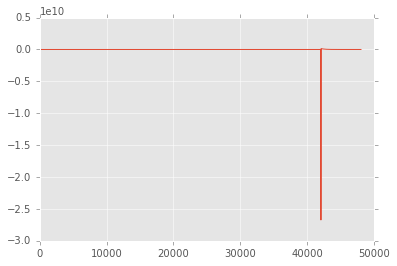

In [30]:
plt.plot(pmtr0)

####  There is a problem with some of the waveforms.

See http://localhost:8888/notebooks/Cities/DIOMIRA-NB-XenonPreprocStudy-10-01-16.ipynb for details

## Running over "old" reference file (Na events)

In [68]:
%less ../../Config/DIOMIRA_NA_ZLIB_test2.csv

In [69]:
%time %run ../../Cities/DIOMIRA.py -c ../../Config/DIOMIRA_NA_ZLIB_test2.csv 

Debug level = INFO
input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_evt1000_RWF.h5
first event = 0 last event = 1000 nof events requested = 1000 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 
lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000
INFO:root:-->event number =0


-->event number =0


INFO:root:-->event number =1


-->event number =1


INFO:root:-->event number =2


-->event number =2


INFO:root:-->event number =3


-->event number =3


INFO:root:-->event number =4


-->event number =4


INFO:root:-->event number =5


-->event number =5


INFO:root:-->event number =6


-->event number =6


INFO:root:-->event number =7


-->event number =7


INFO:root:-->event number =8


-->event number =8


INFO:root:-->event number =9


-->event number =9


INFO:root:-->event number =10


-->event number =10


INFO:root:-->event number =11


-->event number =11


INFO:root:-->event number =12


-->event number =12


INFO:root:-->event number =13


-->event number =13


INFO:root:-->event number =14


-->event number =14


INFO:root:-->event number =15


-->event number =15


INFO:root:-->event number =16


-->event number =16


INFO:root:-->event number =17


-->event number =17


INFO:root:-->event number =18


-->event number =18


INFO:root:-->event number =19


-->event number =19


INFO:root:-->event number =20


-->event number =20


INFO:root:-->event number =21


-->event number =21


INFO:root:-->event number =22


-->event number =22


INFO:root:-->event number =23


-->event number =23


INFO:root:-->event number =24


-->event number =24


INFO:root:-->event number =25


-->event number =25


INFO:root:-->event number =26


-->event number =26


INFO:root:-->event number =27


-->event number =27


INFO:root:-->event number =28


-->event number =28


INFO:root:-->event number =29


-->event number =29


INFO:root:-->event number =30


-->event number =30


INFO:root:-->event number =31


-->event number =31


INFO:root:-->event number =32


-->event number =32


INFO:root:-->event number =33


-->event number =33


INFO:root:-->event number =34


-->event number =34


INFO:root:-->event number =35


-->event number =35


INFO:root:-->event number =36


-->event number =36


INFO:root:-->event number =37


-->event number =37


INFO:root:-->event number =38


-->event number =38


INFO:root:-->event number =39


-->event number =39


INFO:root:-->event number =40


-->event number =40


INFO:root:-->event number =41


-->event number =41


INFO:root:-->event number =42


-->event number =42


INFO:root:-->event number =43


-->event number =43


INFO:root:-->event number =44


-->event number =44


INFO:root:-->event number =45


-->event number =45


INFO:root:-->event number =46


-->event number =46


INFO:root:-->event number =47


-->event number =47


INFO:root:-->event number =48


-->event number =48


INFO:root:-->event number =49


-->event number =49


INFO:root:-->event number =50


-->event number =50


INFO:root:-->event number =51


-->event number =51


INFO:root:-->event number =52


-->event number =52


INFO:root:-->event number =53


-->event number =53


INFO:root:-->event number =54


-->event number =54


INFO:root:-->event number =55


-->event number =55


INFO:root:-->event number =56


-->event number =56


INFO:root:-->event number =57


-->event number =57


INFO:root:-->event number =58


-->event number =58


INFO:root:-->event number =59


-->event number =59


INFO:root:-->event number =60


-->event number =60


INFO:root:-->event number =61


-->event number =61


INFO:root:-->event number =62


-->event number =62


INFO:root:-->event number =63


-->event number =63


INFO:root:-->event number =64


-->event number =64


INFO:root:-->event number =65


-->event number =65


INFO:root:-->event number =66


-->event number =66


INFO:root:-->event number =67


-->event number =67


INFO:root:-->event number =68


-->event number =68


INFO:root:-->event number =69


-->event number =69


INFO:root:-->event number =70


-->event number =70


INFO:root:-->event number =71


-->event number =71


INFO:root:-->event number =72


-->event number =72


INFO:root:-->event number =73


-->event number =73


INFO:root:-->event number =74


-->event number =74


INFO:root:-->event number =75


-->event number =75


INFO:root:-->event number =76


-->event number =76


INFO:root:-->event number =77


-->event number =77


INFO:root:-->event number =78


-->event number =78


INFO:root:-->event number =79


-->event number =79


INFO:root:-->event number =80


-->event number =80


INFO:root:-->event number =81


-->event number =81


INFO:root:-->event number =82


-->event number =82


INFO:root:-->event number =83


-->event number =83


INFO:root:-->event number =84


-->event number =84


INFO:root:-->event number =85


-->event number =85


INFO:root:-->event number =86


-->event number =86


INFO:root:-->event number =87


-->event number =87


INFO:root:-->event number =88


-->event number =88


INFO:root:-->event number =89


-->event number =89


INFO:root:-->event number =90


-->event number =90


INFO:root:-->event number =91


-->event number =91


INFO:root:-->event number =92


-->event number =92


INFO:root:-->event number =93


-->event number =93


INFO:root:-->event number =94


-->event number =94


INFO:root:-->event number =95


-->event number =95


INFO:root:-->event number =96


-->event number =96


INFO:root:-->event number =97


-->event number =97


INFO:root:-->event number =98


-->event number =98


INFO:root:-->event number =99


-->event number =99


INFO:root:-->event number =100


-->event number =100


INFO:root:-->event number =101


-->event number =101


INFO:root:-->event number =102


-->event number =102


INFO:root:-->event number =103


-->event number =103


INFO:root:-->event number =104


-->event number =104


INFO:root:-->event number =105


-->event number =105


INFO:root:-->event number =106


-->event number =106


INFO:root:-->event number =107


-->event number =107


INFO:root:-->event number =108


-->event number =108


INFO:root:-->event number =109


-->event number =109


INFO:root:-->event number =110


-->event number =110


INFO:root:-->event number =111


-->event number =111


INFO:root:-->event number =112


-->event number =112


INFO:root:-->event number =113


-->event number =113


INFO:root:-->event number =114


-->event number =114


INFO:root:-->event number =115


-->event number =115


INFO:root:-->event number =116


-->event number =116


INFO:root:-->event number =117


-->event number =117


INFO:root:-->event number =118


-->event number =118


INFO:root:-->event number =119


-->event number =119


INFO:root:-->event number =120


-->event number =120


INFO:root:-->event number =121


-->event number =121


INFO:root:-->event number =122


-->event number =122


INFO:root:-->event number =123


-->event number =123


INFO:root:-->event number =124


-->event number =124


INFO:root:-->event number =125


-->event number =125


INFO:root:-->event number =126


-->event number =126


INFO:root:-->event number =127


-->event number =127


INFO:root:-->event number =128


-->event number =128


INFO:root:-->event number =129


-->event number =129


INFO:root:-->event number =130


-->event number =130


INFO:root:-->event number =131


-->event number =131


INFO:root:-->event number =132


-->event number =132


INFO:root:-->event number =133


-->event number =133


INFO:root:-->event number =134


-->event number =134


INFO:root:-->event number =135


-->event number =135


INFO:root:-->event number =136


-->event number =136


INFO:root:-->event number =137


-->event number =137


INFO:root:-->event number =138


-->event number =138


INFO:root:-->event number =139


-->event number =139


INFO:root:-->event number =140


-->event number =140


INFO:root:-->event number =141


-->event number =141


INFO:root:-->event number =142


-->event number =142


INFO:root:-->event number =143


-->event number =143


INFO:root:-->event number =144


-->event number =144


INFO:root:-->event number =145


-->event number =145


INFO:root:-->event number =146


-->event number =146


INFO:root:-->event number =147


-->event number =147


INFO:root:-->event number =148


-->event number =148


INFO:root:-->event number =149


-->event number =149


INFO:root:-->event number =150


-->event number =150


INFO:root:-->event number =151


-->event number =151


INFO:root:-->event number =152


-->event number =152


INFO:root:-->event number =153


-->event number =153


INFO:root:-->event number =154


-->event number =154


INFO:root:-->event number =155


-->event number =155


INFO:root:-->event number =156


-->event number =156


INFO:root:-->event number =157


-->event number =157


INFO:root:-->event number =158


-->event number =158


INFO:root:-->event number =159


-->event number =159


INFO:root:-->event number =160


-->event number =160


INFO:root:-->event number =161


-->event number =161


INFO:root:-->event number =162


-->event number =162


INFO:root:-->event number =163


-->event number =163


INFO:root:-->event number =164


-->event number =164


INFO:root:-->event number =165


-->event number =165


INFO:root:-->event number =166


-->event number =166


INFO:root:-->event number =167


-->event number =167


INFO:root:-->event number =168


-->event number =168


INFO:root:-->event number =169


-->event number =169


INFO:root:-->event number =170


-->event number =170


INFO:root:-->event number =171


-->event number =171


INFO:root:-->event number =172


-->event number =172


INFO:root:-->event number =173


-->event number =173


INFO:root:-->event number =174


-->event number =174


INFO:root:-->event number =175


-->event number =175


INFO:root:-->event number =176


-->event number =176


INFO:root:-->event number =177


-->event number =177


INFO:root:-->event number =178


-->event number =178


INFO:root:-->event number =179


-->event number =179


INFO:root:-->event number =180


-->event number =180


INFO:root:-->event number =181


-->event number =181


INFO:root:-->event number =182


-->event number =182


INFO:root:-->event number =183


-->event number =183


INFO:root:-->event number =184


-->event number =184


INFO:root:-->event number =185


-->event number =185


INFO:root:-->event number =186


-->event number =186


INFO:root:-->event number =187


-->event number =187


INFO:root:-->event number =188


-->event number =188


INFO:root:-->event number =189


-->event number =189


INFO:root:-->event number =190


-->event number =190


INFO:root:-->event number =191


-->event number =191


INFO:root:-->event number =192


-->event number =192


INFO:root:-->event number =193


-->event number =193


INFO:root:-->event number =194


-->event number =194


INFO:root:-->event number =195


-->event number =195


INFO:root:-->event number =196


-->event number =196


INFO:root:-->event number =197


-->event number =197


INFO:root:-->event number =198


-->event number =198


INFO:root:-->event number =199


-->event number =199


INFO:root:-->event number =200


-->event number =200


INFO:root:-->event number =201


-->event number =201


INFO:root:-->event number =202


-->event number =202


INFO:root:-->event number =203


-->event number =203


INFO:root:-->event number =204


-->event number =204


INFO:root:-->event number =205


-->event number =205


INFO:root:-->event number =206


-->event number =206


INFO:root:-->event number =207


-->event number =207


INFO:root:-->event number =208


-->event number =208


INFO:root:-->event number =209


-->event number =209


INFO:root:-->event number =210


-->event number =210


INFO:root:-->event number =211


-->event number =211


INFO:root:-->event number =212


-->event number =212


INFO:root:-->event number =213


-->event number =213


INFO:root:-->event number =214


-->event number =214


INFO:root:-->event number =215


-->event number =215


INFO:root:-->event number =216


-->event number =216


INFO:root:-->event number =217


-->event number =217


INFO:root:-->event number =218


-->event number =218


INFO:root:-->event number =219


-->event number =219


INFO:root:-->event number =220


-->event number =220


INFO:root:-->event number =221


-->event number =221


INFO:root:-->event number =222


-->event number =222


INFO:root:-->event number =223


-->event number =223


INFO:root:-->event number =224


-->event number =224


INFO:root:-->event number =225


-->event number =225


INFO:root:-->event number =226


-->event number =226


INFO:root:-->event number =227


-->event number =227


INFO:root:-->event number =228


-->event number =228


INFO:root:-->event number =229


-->event number =229


INFO:root:-->event number =230


-->event number =230


INFO:root:-->event number =231


-->event number =231


INFO:root:-->event number =232


-->event number =232


INFO:root:-->event number =233


-->event number =233


INFO:root:-->event number =234


-->event number =234


INFO:root:-->event number =235


-->event number =235


INFO:root:-->event number =236


-->event number =236


INFO:root:-->event number =237


-->event number =237


INFO:root:-->event number =238


-->event number =238


INFO:root:-->event number =239


-->event number =239


INFO:root:-->event number =240


-->event number =240


INFO:root:-->event number =241


-->event number =241


INFO:root:-->event number =242


-->event number =242


INFO:root:-->event number =243


-->event number =243


INFO:root:-->event number =244


-->event number =244


INFO:root:-->event number =245


-->event number =245


INFO:root:-->event number =246


-->event number =246


INFO:root:-->event number =247


-->event number =247


INFO:root:-->event number =248


-->event number =248


INFO:root:-->event number =249


-->event number =249


INFO:root:-->event number =250


-->event number =250


INFO:root:-->event number =251


-->event number =251


INFO:root:-->event number =252


-->event number =252


INFO:root:-->event number =253


-->event number =253


INFO:root:-->event number =254


-->event number =254


INFO:root:-->event number =255


-->event number =255


INFO:root:-->event number =256


-->event number =256


INFO:root:-->event number =257


-->event number =257


INFO:root:-->event number =258


-->event number =258


INFO:root:-->event number =259


-->event number =259


INFO:root:-->event number =260


-->event number =260


INFO:root:-->event number =261


-->event number =261


INFO:root:-->event number =262


-->event number =262


INFO:root:-->event number =263


-->event number =263


INFO:root:-->event number =264


-->event number =264


INFO:root:-->event number =265


-->event number =265


INFO:root:-->event number =266


-->event number =266


INFO:root:-->event number =267


-->event number =267


INFO:root:-->event number =268


-->event number =268


INFO:root:-->event number =269


-->event number =269


INFO:root:-->event number =270


-->event number =270


INFO:root:-->event number =271


-->event number =271


INFO:root:-->event number =272


-->event number =272


INFO:root:-->event number =273


-->event number =273


INFO:root:-->event number =274


-->event number =274


INFO:root:-->event number =275


-->event number =275


INFO:root:-->event number =276


-->event number =276


INFO:root:-->event number =277


-->event number =277


INFO:root:-->event number =278


-->event number =278


INFO:root:-->event number =279


-->event number =279


INFO:root:-->event number =280


-->event number =280


INFO:root:-->event number =281


-->event number =281


INFO:root:-->event number =282


-->event number =282


INFO:root:-->event number =283


-->event number =283


INFO:root:-->event number =284


-->event number =284


INFO:root:-->event number =285


-->event number =285


INFO:root:-->event number =286


-->event number =286


INFO:root:-->event number =287


-->event number =287


INFO:root:-->event number =288


-->event number =288


INFO:root:-->event number =289


-->event number =289


INFO:root:-->event number =290


-->event number =290


INFO:root:-->event number =291


-->event number =291


INFO:root:-->event number =292


-->event number =292


INFO:root:-->event number =293


-->event number =293


INFO:root:-->event number =294


-->event number =294


INFO:root:-->event number =295


-->event number =295


INFO:root:-->event number =296


-->event number =296


INFO:root:-->event number =297


-->event number =297


INFO:root:-->event number =298


-->event number =298


INFO:root:-->event number =299


-->event number =299


INFO:root:-->event number =300


-->event number =300


INFO:root:-->event number =301


-->event number =301


INFO:root:-->event number =302


-->event number =302


INFO:root:-->event number =303


-->event number =303


INFO:root:-->event number =304


-->event number =304


INFO:root:-->event number =305


-->event number =305


INFO:root:-->event number =306


-->event number =306


INFO:root:-->event number =307


-->event number =307


INFO:root:-->event number =308


-->event number =308


INFO:root:-->event number =309


-->event number =309


INFO:root:-->event number =310


-->event number =310


INFO:root:-->event number =311


-->event number =311


INFO:root:-->event number =312


-->event number =312


INFO:root:-->event number =313


-->event number =313


INFO:root:-->event number =314


-->event number =314


INFO:root:-->event number =315


-->event number =315


INFO:root:-->event number =316


-->event number =316


INFO:root:-->event number =317


-->event number =317


INFO:root:-->event number =318


-->event number =318


INFO:root:-->event number =319


-->event number =319


INFO:root:-->event number =320


-->event number =320


INFO:root:-->event number =321


-->event number =321


INFO:root:-->event number =322


-->event number =322


INFO:root:-->event number =323


-->event number =323


INFO:root:-->event number =324


-->event number =324


INFO:root:-->event number =325


-->event number =325


INFO:root:-->event number =326


-->event number =326


INFO:root:-->event number =327


-->event number =327


INFO:root:-->event number =328


-->event number =328


INFO:root:-->event number =329


-->event number =329


INFO:root:-->event number =330


-->event number =330


INFO:root:-->event number =331


-->event number =331


INFO:root:-->event number =332


-->event number =332


INFO:root:-->event number =333


-->event number =333


INFO:root:-->event number =334


-->event number =334


INFO:root:-->event number =335


-->event number =335


INFO:root:-->event number =336


-->event number =336


INFO:root:-->event number =337


-->event number =337


INFO:root:-->event number =338


-->event number =338


INFO:root:-->event number =339


-->event number =339


INFO:root:-->event number =340


-->event number =340


INFO:root:-->event number =341


-->event number =341


INFO:root:-->event number =342


-->event number =342


INFO:root:-->event number =343


-->event number =343


INFO:root:-->event number =344


-->event number =344


INFO:root:-->event number =345


-->event number =345


INFO:root:-->event number =346


-->event number =346


INFO:root:-->event number =347


-->event number =347


INFO:root:-->event number =348


-->event number =348


INFO:root:-->event number =349


-->event number =349


INFO:root:-->event number =350


-->event number =350


INFO:root:-->event number =351


-->event number =351


INFO:root:-->event number =352


-->event number =352


INFO:root:-->event number =353


-->event number =353


INFO:root:-->event number =354


-->event number =354


INFO:root:-->event number =355


-->event number =355


INFO:root:-->event number =356


-->event number =356


INFO:root:-->event number =357


-->event number =357


INFO:root:-->event number =358


-->event number =358


INFO:root:-->event number =359


-->event number =359


INFO:root:-->event number =360


-->event number =360


INFO:root:-->event number =361


-->event number =361


INFO:root:-->event number =362


-->event number =362


INFO:root:-->event number =363


-->event number =363


INFO:root:-->event number =364


-->event number =364


INFO:root:-->event number =365


-->event number =365


INFO:root:-->event number =366


-->event number =366


INFO:root:-->event number =367


-->event number =367


INFO:root:-->event number =368


-->event number =368


INFO:root:-->event number =369


-->event number =369


INFO:root:-->event number =370


-->event number =370


INFO:root:-->event number =371


-->event number =371


INFO:root:-->event number =372


-->event number =372


INFO:root:-->event number =373


-->event number =373


INFO:root:-->event number =374


-->event number =374


INFO:root:-->event number =375


-->event number =375


INFO:root:-->event number =376


-->event number =376


INFO:root:-->event number =377


-->event number =377


INFO:root:-->event number =378


-->event number =378


INFO:root:-->event number =379


-->event number =379


INFO:root:-->event number =380


-->event number =380


INFO:root:-->event number =381


-->event number =381


INFO:root:-->event number =382


-->event number =382


INFO:root:-->event number =383


-->event number =383


INFO:root:-->event number =384


-->event number =384


INFO:root:-->event number =385


-->event number =385


INFO:root:-->event number =386


-->event number =386


INFO:root:-->event number =387


-->event number =387


INFO:root:-->event number =388


-->event number =388


INFO:root:-->event number =389


-->event number =389


INFO:root:-->event number =390


-->event number =390


INFO:root:-->event number =391


-->event number =391


INFO:root:-->event number =392


-->event number =392


INFO:root:-->event number =393


-->event number =393


INFO:root:-->event number =394


-->event number =394


INFO:root:-->event number =395


-->event number =395


INFO:root:-->event number =396


-->event number =396


INFO:root:-->event number =397


-->event number =397


INFO:root:-->event number =398


-->event number =398


INFO:root:-->event number =399


-->event number =399


INFO:root:-->event number =400


-->event number =400


INFO:root:-->event number =401


-->event number =401


INFO:root:-->event number =402


-->event number =402


INFO:root:-->event number =403


-->event number =403


INFO:root:-->event number =404


-->event number =404


INFO:root:-->event number =405


-->event number =405


INFO:root:-->event number =406


-->event number =406


INFO:root:-->event number =407


-->event number =407


INFO:root:-->event number =408


-->event number =408


INFO:root:-->event number =409


-->event number =409


INFO:root:-->event number =410


-->event number =410


INFO:root:-->event number =411


-->event number =411


INFO:root:-->event number =412


-->event number =412


INFO:root:-->event number =413


-->event number =413


INFO:root:-->event number =414


-->event number =414


INFO:root:-->event number =415


-->event number =415


INFO:root:-->event number =416


-->event number =416


INFO:root:-->event number =417


-->event number =417


INFO:root:-->event number =418


-->event number =418


INFO:root:-->event number =419


-->event number =419


INFO:root:-->event number =420


-->event number =420


INFO:root:-->event number =421


-->event number =421


INFO:root:-->event number =422


-->event number =422


INFO:root:-->event number =423


-->event number =423


INFO:root:-->event number =424


-->event number =424


INFO:root:-->event number =425


-->event number =425


INFO:root:-->event number =426


-->event number =426


INFO:root:-->event number =427


-->event number =427


INFO:root:-->event number =428


-->event number =428


INFO:root:-->event number =429


-->event number =429


INFO:root:-->event number =430


-->event number =430


INFO:root:-->event number =431


-->event number =431


INFO:root:-->event number =432


-->event number =432


INFO:root:-->event number =433


-->event number =433


INFO:root:-->event number =434


-->event number =434


INFO:root:-->event number =435


-->event number =435


INFO:root:-->event number =436


-->event number =436


INFO:root:-->event number =437


-->event number =437


INFO:root:-->event number =438


-->event number =438


INFO:root:-->event number =439


-->event number =439


INFO:root:-->event number =440


-->event number =440


INFO:root:-->event number =441


-->event number =441


INFO:root:-->event number =442


-->event number =442


INFO:root:-->event number =443


-->event number =443


INFO:root:-->event number =444


-->event number =444


INFO:root:-->event number =445


-->event number =445


INFO:root:-->event number =446


-->event number =446


INFO:root:-->event number =447


-->event number =447


INFO:root:-->event number =448


-->event number =448


INFO:root:-->event number =449


-->event number =449


INFO:root:-->event number =450


-->event number =450


INFO:root:-->event number =451


-->event number =451


INFO:root:-->event number =452


-->event number =452


INFO:root:-->event number =453


-->event number =453


INFO:root:-->event number =454


-->event number =454


INFO:root:-->event number =455


-->event number =455


INFO:root:-->event number =456


-->event number =456


INFO:root:-->event number =457


-->event number =457


INFO:root:-->event number =458


-->event number =458


INFO:root:-->event number =459


-->event number =459


INFO:root:-->event number =460


-->event number =460


INFO:root:-->event number =461


-->event number =461


INFO:root:-->event number =462


-->event number =462


INFO:root:-->event number =463


-->event number =463


INFO:root:-->event number =464


-->event number =464


INFO:root:-->event number =465


-->event number =465


INFO:root:-->event number =466


-->event number =466


INFO:root:-->event number =467


-->event number =467


INFO:root:-->event number =468


-->event number =468


INFO:root:-->event number =469


-->event number =469


INFO:root:-->event number =470


-->event number =470


INFO:root:-->event number =471


-->event number =471


INFO:root:-->event number =472


-->event number =472


INFO:root:-->event number =473


-->event number =473


INFO:root:-->event number =474


-->event number =474


INFO:root:-->event number =475


-->event number =475


INFO:root:-->event number =476


-->event number =476


INFO:root:-->event number =477


-->event number =477


INFO:root:-->event number =478


-->event number =478


INFO:root:-->event number =479


-->event number =479


INFO:root:-->event number =480


-->event number =480


INFO:root:-->event number =481


-->event number =481


INFO:root:-->event number =482


-->event number =482


INFO:root:-->event number =483


-->event number =483


INFO:root:-->event number =484


-->event number =484


INFO:root:-->event number =485


-->event number =485


INFO:root:-->event number =486


-->event number =486


INFO:root:-->event number =487


-->event number =487


INFO:root:-->event number =488


-->event number =488


INFO:root:-->event number =489


-->event number =489


INFO:root:-->event number =490


-->event number =490


INFO:root:-->event number =491


-->event number =491


INFO:root:-->event number =492


-->event number =492


INFO:root:-->event number =493


-->event number =493


INFO:root:-->event number =494


-->event number =494


INFO:root:-->event number =495


-->event number =495


INFO:root:-->event number =496


-->event number =496


INFO:root:-->event number =497


-->event number =497


INFO:root:-->event number =498


-->event number =498


INFO:root:-->event number =499


-->event number =499


INFO:root:-->event number =500


-->event number =500


INFO:root:-->event number =501


-->event number =501


INFO:root:-->event number =502


-->event number =502


INFO:root:-->event number =503


-->event number =503


INFO:root:-->event number =504


-->event number =504


INFO:root:-->event number =505


-->event number =505


INFO:root:-->event number =506


-->event number =506


INFO:root:-->event number =507


-->event number =507


INFO:root:-->event number =508


-->event number =508


INFO:root:-->event number =509


-->event number =509


INFO:root:-->event number =510


-->event number =510


INFO:root:-->event number =511


-->event number =511


INFO:root:-->event number =512


-->event number =512


INFO:root:-->event number =513


-->event number =513


INFO:root:-->event number =514


-->event number =514


INFO:root:-->event number =515


-->event number =515


INFO:root:-->event number =516


-->event number =516


INFO:root:-->event number =517


-->event number =517


INFO:root:-->event number =518


-->event number =518


INFO:root:-->event number =519


-->event number =519


INFO:root:-->event number =520


-->event number =520


INFO:root:-->event number =521


-->event number =521


INFO:root:-->event number =522


-->event number =522


INFO:root:-->event number =523


-->event number =523


INFO:root:-->event number =524


-->event number =524


INFO:root:-->event number =525


-->event number =525


INFO:root:-->event number =526


-->event number =526


INFO:root:-->event number =527


-->event number =527


INFO:root:-->event number =528


-->event number =528


INFO:root:-->event number =529


-->event number =529


INFO:root:-->event number =530


-->event number =530


INFO:root:-->event number =531


-->event number =531


INFO:root:-->event number =532


-->event number =532


INFO:root:-->event number =533


-->event number =533


INFO:root:-->event number =534


-->event number =534


INFO:root:-->event number =535


-->event number =535


INFO:root:-->event number =536


-->event number =536


INFO:root:-->event number =537


-->event number =537


INFO:root:-->event number =538


-->event number =538


INFO:root:-->event number =539


-->event number =539


INFO:root:-->event number =540


-->event number =540


INFO:root:-->event number =541


-->event number =541


INFO:root:-->event number =542


-->event number =542


INFO:root:-->event number =543


-->event number =543


INFO:root:-->event number =544


-->event number =544


INFO:root:-->event number =545


-->event number =545


INFO:root:-->event number =546


-->event number =546


INFO:root:-->event number =547


-->event number =547


INFO:root:-->event number =548


-->event number =548


INFO:root:-->event number =549


-->event number =549


INFO:root:-->event number =550


-->event number =550


INFO:root:-->event number =551


-->event number =551


INFO:root:-->event number =552


-->event number =552


INFO:root:-->event number =553


-->event number =553


INFO:root:-->event number =554


-->event number =554


INFO:root:-->event number =555


-->event number =555


INFO:root:-->event number =556


-->event number =556


INFO:root:-->event number =557


-->event number =557


INFO:root:-->event number =558


-->event number =558


INFO:root:-->event number =559


-->event number =559


INFO:root:-->event number =560


-->event number =560


INFO:root:-->event number =561


-->event number =561


INFO:root:-->event number =562


-->event number =562


INFO:root:-->event number =563


-->event number =563


INFO:root:-->event number =564


-->event number =564


INFO:root:-->event number =565


-->event number =565


INFO:root:-->event number =566


-->event number =566


INFO:root:-->event number =567


-->event number =567


INFO:root:-->event number =568


-->event number =568


INFO:root:-->event number =569


-->event number =569


INFO:root:-->event number =570


-->event number =570


INFO:root:-->event number =571


-->event number =571


INFO:root:-->event number =572


-->event number =572


INFO:root:-->event number =573


-->event number =573


INFO:root:-->event number =574


-->event number =574


INFO:root:-->event number =575


-->event number =575


INFO:root:-->event number =576


-->event number =576


INFO:root:-->event number =577


-->event number =577


INFO:root:-->event number =578


-->event number =578


INFO:root:-->event number =579


-->event number =579


INFO:root:-->event number =580


-->event number =580


INFO:root:-->event number =581


-->event number =581


INFO:root:-->event number =582


-->event number =582


INFO:root:-->event number =583


-->event number =583


INFO:root:-->event number =584


-->event number =584


INFO:root:-->event number =585


-->event number =585


INFO:root:-->event number =586


-->event number =586


INFO:root:-->event number =587


-->event number =587


INFO:root:-->event number =588


-->event number =588


INFO:root:-->event number =589


-->event number =589


INFO:root:-->event number =590


-->event number =590


INFO:root:-->event number =591


-->event number =591


INFO:root:-->event number =592


-->event number =592


INFO:root:-->event number =593


-->event number =593


INFO:root:-->event number =594


-->event number =594


INFO:root:-->event number =595


-->event number =595


INFO:root:-->event number =596


-->event number =596


INFO:root:-->event number =597


-->event number =597


INFO:root:-->event number =598


-->event number =598


INFO:root:-->event number =599


-->event number =599


INFO:root:-->event number =600


-->event number =600


INFO:root:-->event number =601


-->event number =601


INFO:root:-->event number =602


-->event number =602


INFO:root:-->event number =603


-->event number =603


INFO:root:-->event number =604


-->event number =604


INFO:root:-->event number =605


-->event number =605


INFO:root:-->event number =606


-->event number =606


INFO:root:-->event number =607


-->event number =607


INFO:root:-->event number =608


-->event number =608


INFO:root:-->event number =609


-->event number =609


INFO:root:-->event number =610


-->event number =610


INFO:root:-->event number =611


-->event number =611


INFO:root:-->event number =612


-->event number =612


INFO:root:-->event number =613


-->event number =613


INFO:root:-->event number =614


-->event number =614


INFO:root:-->event number =615


-->event number =615


INFO:root:-->event number =616


-->event number =616


INFO:root:-->event number =617


-->event number =617


INFO:root:-->event number =618


-->event number =618


INFO:root:-->event number =619


-->event number =619


INFO:root:-->event number =620


-->event number =620


INFO:root:-->event number =621


-->event number =621


INFO:root:-->event number =622


-->event number =622


INFO:root:-->event number =623


-->event number =623


INFO:root:-->event number =624


-->event number =624


INFO:root:-->event number =625


-->event number =625


INFO:root:-->event number =626


-->event number =626


INFO:root:-->event number =627


-->event number =627


INFO:root:-->event number =628


-->event number =628


INFO:root:-->event number =629


-->event number =629


INFO:root:-->event number =630


-->event number =630


INFO:root:-->event number =631


-->event number =631


INFO:root:-->event number =632


-->event number =632


INFO:root:-->event number =633


-->event number =633


INFO:root:-->event number =634


-->event number =634


INFO:root:-->event number =635


-->event number =635


INFO:root:-->event number =636


-->event number =636


INFO:root:-->event number =637


-->event number =637


INFO:root:-->event number =638


-->event number =638


INFO:root:-->event number =639


-->event number =639


INFO:root:-->event number =640


-->event number =640


INFO:root:-->event number =641


-->event number =641


INFO:root:-->event number =642


-->event number =642


INFO:root:-->event number =643


-->event number =643


INFO:root:-->event number =644


-->event number =644


INFO:root:-->event number =645


-->event number =645


INFO:root:-->event number =646


-->event number =646


INFO:root:-->event number =647


-->event number =647


INFO:root:-->event number =648


-->event number =648


INFO:root:-->event number =649


-->event number =649


INFO:root:-->event number =650


-->event number =650


INFO:root:-->event number =651


-->event number =651


INFO:root:-->event number =652


-->event number =652


INFO:root:-->event number =653


-->event number =653


INFO:root:-->event number =654


-->event number =654


INFO:root:-->event number =655


-->event number =655


INFO:root:-->event number =656


-->event number =656


INFO:root:-->event number =657


-->event number =657


INFO:root:-->event number =658


-->event number =658


INFO:root:-->event number =659


-->event number =659


INFO:root:-->event number =660


-->event number =660


INFO:root:-->event number =661


-->event number =661


INFO:root:-->event number =662


-->event number =662


INFO:root:-->event number =663


-->event number =663


INFO:root:-->event number =664


-->event number =664


INFO:root:-->event number =665


-->event number =665


INFO:root:-->event number =666


-->event number =666


INFO:root:-->event number =667


-->event number =667


INFO:root:-->event number =668


-->event number =668


INFO:root:-->event number =669


-->event number =669


INFO:root:-->event number =670


-->event number =670


INFO:root:-->event number =671


-->event number =671


INFO:root:-->event number =672


-->event number =672


INFO:root:-->event number =673


-->event number =673


INFO:root:-->event number =674


-->event number =674


INFO:root:-->event number =675


-->event number =675


INFO:root:-->event number =676


-->event number =676


INFO:root:-->event number =677


-->event number =677


INFO:root:-->event number =678


-->event number =678


INFO:root:-->event number =679


-->event number =679


INFO:root:-->event number =680


-->event number =680


INFO:root:-->event number =681


-->event number =681


INFO:root:-->event number =682


-->event number =682


INFO:root:-->event number =683


-->event number =683


INFO:root:-->event number =684


-->event number =684


INFO:root:-->event number =685


-->event number =685


INFO:root:-->event number =686


-->event number =686


INFO:root:-->event number =687


-->event number =687


INFO:root:-->event number =688


-->event number =688


INFO:root:-->event number =689


-->event number =689


INFO:root:-->event number =690


-->event number =690


INFO:root:-->event number =691


-->event number =691


INFO:root:-->event number =692


-->event number =692


INFO:root:-->event number =693


-->event number =693


INFO:root:-->event number =694


-->event number =694


INFO:root:-->event number =695


-->event number =695


INFO:root:-->event number =696


-->event number =696


INFO:root:-->event number =697


-->event number =697


INFO:root:-->event number =698


-->event number =698


INFO:root:-->event number =699


-->event number =699


INFO:root:-->event number =700


-->event number =700


INFO:root:-->event number =701


-->event number =701


INFO:root:-->event number =702


-->event number =702


INFO:root:-->event number =703


-->event number =703


INFO:root:-->event number =704


-->event number =704


INFO:root:-->event number =705


-->event number =705


INFO:root:-->event number =706


-->event number =706


INFO:root:-->event number =707


-->event number =707


INFO:root:-->event number =708


-->event number =708


INFO:root:-->event number =709


-->event number =709


INFO:root:-->event number =710


-->event number =710


INFO:root:-->event number =711


-->event number =711


INFO:root:-->event number =712


-->event number =712


INFO:root:-->event number =713


-->event number =713


INFO:root:-->event number =714


-->event number =714


INFO:root:-->event number =715


-->event number =715


INFO:root:-->event number =716


-->event number =716


INFO:root:-->event number =717


-->event number =717


INFO:root:-->event number =718


-->event number =718


INFO:root:-->event number =719


-->event number =719


INFO:root:-->event number =720


-->event number =720


INFO:root:-->event number =721


-->event number =721


INFO:root:-->event number =722


-->event number =722


INFO:root:-->event number =723


-->event number =723


INFO:root:-->event number =724


-->event number =724


INFO:root:-->event number =725


-->event number =725


INFO:root:-->event number =726


-->event number =726


INFO:root:-->event number =727


-->event number =727


INFO:root:-->event number =728


-->event number =728


INFO:root:-->event number =729


-->event number =729


INFO:root:-->event number =730


-->event number =730


INFO:root:-->event number =731


-->event number =731


INFO:root:-->event number =732


-->event number =732


INFO:root:-->event number =733


-->event number =733


INFO:root:-->event number =734


-->event number =734


INFO:root:-->event number =735


-->event number =735


INFO:root:-->event number =736


-->event number =736


INFO:root:-->event number =737


-->event number =737


INFO:root:-->event number =738


-->event number =738


INFO:root:-->event number =739


-->event number =739


INFO:root:-->event number =740


-->event number =740


INFO:root:-->event number =741


-->event number =741


INFO:root:-->event number =742


-->event number =742


INFO:root:-->event number =743


-->event number =743


INFO:root:-->event number =744


-->event number =744


INFO:root:-->event number =745


-->event number =745


INFO:root:-->event number =746


-->event number =746


INFO:root:-->event number =747


-->event number =747


INFO:root:-->event number =748


-->event number =748


INFO:root:-->event number =749


-->event number =749


INFO:root:-->event number =750


-->event number =750


INFO:root:-->event number =751


-->event number =751


INFO:root:-->event number =752


-->event number =752


INFO:root:-->event number =753


-->event number =753


INFO:root:-->event number =754


-->event number =754


INFO:root:-->event number =755


-->event number =755


INFO:root:-->event number =756


-->event number =756


INFO:root:-->event number =757


-->event number =757


INFO:root:-->event number =758


-->event number =758


INFO:root:-->event number =759


-->event number =759


INFO:root:-->event number =760


-->event number =760


INFO:root:-->event number =761


-->event number =761


INFO:root:-->event number =762


-->event number =762


INFO:root:-->event number =763


-->event number =763


INFO:root:-->event number =764


-->event number =764


INFO:root:-->event number =765


-->event number =765


INFO:root:-->event number =766


-->event number =766


INFO:root:-->event number =767


-->event number =767


INFO:root:-->event number =768


-->event number =768


INFO:root:-->event number =769


-->event number =769


INFO:root:-->event number =770


-->event number =770


INFO:root:-->event number =771


-->event number =771


INFO:root:-->event number =772


-->event number =772


INFO:root:-->event number =773


-->event number =773


INFO:root:-->event number =774


-->event number =774


INFO:root:-->event number =775


-->event number =775


INFO:root:-->event number =776


-->event number =776


INFO:root:-->event number =777


-->event number =777


INFO:root:-->event number =778


-->event number =778


INFO:root:-->event number =779


-->event number =779


INFO:root:-->event number =780


-->event number =780


INFO:root:-->event number =781


-->event number =781


INFO:root:-->event number =782


-->event number =782


INFO:root:-->event number =783


-->event number =783


INFO:root:-->event number =784


-->event number =784


INFO:root:-->event number =785


-->event number =785


INFO:root:-->event number =786


-->event number =786


INFO:root:-->event number =787


-->event number =787


INFO:root:-->event number =788


-->event number =788


INFO:root:-->event number =789


-->event number =789


INFO:root:-->event number =790


-->event number =790


INFO:root:-->event number =791


-->event number =791


INFO:root:-->event number =792


-->event number =792


INFO:root:-->event number =793


-->event number =793


INFO:root:-->event number =794


-->event number =794


INFO:root:-->event number =795


-->event number =795


INFO:root:-->event number =796


-->event number =796


INFO:root:-->event number =797


-->event number =797


INFO:root:-->event number =798


-->event number =798


INFO:root:-->event number =799


-->event number =799


INFO:root:-->event number =800


-->event number =800


INFO:root:-->event number =801


-->event number =801


INFO:root:-->event number =802


-->event number =802


INFO:root:-->event number =803


-->event number =803


INFO:root:-->event number =804


-->event number =804


INFO:root:-->event number =805


-->event number =805


INFO:root:-->event number =806


-->event number =806


INFO:root:-->event number =807


-->event number =807


INFO:root:-->event number =808


-->event number =808


INFO:root:-->event number =809


-->event number =809


INFO:root:-->event number =810


-->event number =810


INFO:root:-->event number =811


-->event number =811


INFO:root:-->event number =812


-->event number =812


INFO:root:-->event number =813


-->event number =813


INFO:root:-->event number =814


-->event number =814


INFO:root:-->event number =815


-->event number =815


INFO:root:-->event number =816


-->event number =816


INFO:root:-->event number =817


-->event number =817


INFO:root:-->event number =818


-->event number =818


INFO:root:-->event number =819


-->event number =819


INFO:root:-->event number =820


-->event number =820


INFO:root:-->event number =821


-->event number =821


INFO:root:-->event number =822


-->event number =822


INFO:root:-->event number =823


-->event number =823


INFO:root:-->event number =824


-->event number =824


INFO:root:-->event number =825


-->event number =825


INFO:root:-->event number =826


-->event number =826


INFO:root:-->event number =827


-->event number =827


INFO:root:-->event number =828


-->event number =828


INFO:root:-->event number =829


-->event number =829


INFO:root:-->event number =830


-->event number =830


INFO:root:-->event number =831


-->event number =831


INFO:root:-->event number =832


-->event number =832


INFO:root:-->event number =833


-->event number =833


INFO:root:-->event number =834


-->event number =834


INFO:root:-->event number =835


-->event number =835


INFO:root:-->event number =836


-->event number =836


INFO:root:-->event number =837


-->event number =837


INFO:root:-->event number =838


-->event number =838


INFO:root:-->event number =839


-->event number =839


INFO:root:-->event number =840


-->event number =840


INFO:root:-->event number =841


-->event number =841


INFO:root:-->event number =842


-->event number =842


INFO:root:-->event number =843


-->event number =843


INFO:root:-->event number =844


-->event number =844


INFO:root:-->event number =845


-->event number =845


INFO:root:-->event number =846


-->event number =846


INFO:root:-->event number =847


-->event number =847


INFO:root:-->event number =848


-->event number =848


INFO:root:-->event number =849


-->event number =849


INFO:root:-->event number =850


-->event number =850


INFO:root:-->event number =851


-->event number =851


INFO:root:-->event number =852


-->event number =852


INFO:root:-->event number =853


-->event number =853


INFO:root:-->event number =854


-->event number =854


INFO:root:-->event number =855


-->event number =855


INFO:root:-->event number =856


-->event number =856


INFO:root:-->event number =857


-->event number =857


INFO:root:-->event number =858


-->event number =858


INFO:root:-->event number =859


-->event number =859


INFO:root:-->event number =860


-->event number =860


INFO:root:-->event number =861


-->event number =861


INFO:root:-->event number =862


-->event number =862


INFO:root:-->event number =863


-->event number =863


INFO:root:-->event number =864


-->event number =864


INFO:root:-->event number =865


-->event number =865


INFO:root:-->event number =866


-->event number =866


INFO:root:-->event number =867


-->event number =867


INFO:root:-->event number =868


-->event number =868


INFO:root:-->event number =869


-->event number =869


INFO:root:-->event number =870


-->event number =870


INFO:root:-->event number =871


-->event number =871


INFO:root:-->event number =872


-->event number =872


INFO:root:-->event number =873


-->event number =873


INFO:root:-->event number =874


-->event number =874


INFO:root:-->event number =875


-->event number =875


INFO:root:-->event number =876


-->event number =876


INFO:root:-->event number =877


-->event number =877


INFO:root:-->event number =878


-->event number =878


INFO:root:-->event number =879


-->event number =879


INFO:root:-->event number =880


-->event number =880


INFO:root:-->event number =881


-->event number =881


INFO:root:-->event number =882


-->event number =882


INFO:root:-->event number =883


-->event number =883


INFO:root:-->event number =884


-->event number =884


INFO:root:-->event number =885


-->event number =885


INFO:root:-->event number =886


-->event number =886


INFO:root:-->event number =887


-->event number =887


INFO:root:-->event number =888


-->event number =888


INFO:root:-->event number =889


-->event number =889


INFO:root:-->event number =890


-->event number =890


INFO:root:-->event number =891


-->event number =891


INFO:root:-->event number =892


-->event number =892


INFO:root:-->event number =893


-->event number =893


INFO:root:-->event number =894


-->event number =894


INFO:root:-->event number =895


-->event number =895


INFO:root:-->event number =896


-->event number =896


INFO:root:-->event number =897


-->event number =897


INFO:root:-->event number =898


-->event number =898


INFO:root:-->event number =899


-->event number =899


INFO:root:-->event number =900


-->event number =900


INFO:root:-->event number =901


-->event number =901


INFO:root:-->event number =902


-->event number =902


INFO:root:-->event number =903


-->event number =903


INFO:root:-->event number =904


-->event number =904


INFO:root:-->event number =905


-->event number =905


INFO:root:-->event number =906


-->event number =906


INFO:root:-->event number =907


-->event number =907


INFO:root:-->event number =908


-->event number =908


INFO:root:-->event number =909


-->event number =909


INFO:root:-->event number =910


-->event number =910


INFO:root:-->event number =911


-->event number =911


INFO:root:-->event number =912


-->event number =912


INFO:root:-->event number =913


-->event number =913


INFO:root:-->event number =914


-->event number =914


INFO:root:-->event number =915


-->event number =915


INFO:root:-->event number =916


-->event number =916


INFO:root:-->event number =917


-->event number =917


INFO:root:-->event number =918


-->event number =918


INFO:root:-->event number =919


-->event number =919


INFO:root:-->event number =920


-->event number =920


INFO:root:-->event number =921


-->event number =921


INFO:root:-->event number =922


-->event number =922


INFO:root:-->event number =923


-->event number =923


INFO:root:-->event number =924


-->event number =924


INFO:root:-->event number =925


-->event number =925


INFO:root:-->event number =926


-->event number =926


INFO:root:-->event number =927


-->event number =927


INFO:root:-->event number =928


-->event number =928


INFO:root:-->event number =929


-->event number =929


INFO:root:-->event number =930


-->event number =930


INFO:root:-->event number =931


-->event number =931


INFO:root:-->event number =932


-->event number =932


INFO:root:-->event number =933


-->event number =933


INFO:root:-->event number =934


-->event number =934


INFO:root:-->event number =935


-->event number =935


INFO:root:-->event number =936


-->event number =936


INFO:root:-->event number =937


-->event number =937


INFO:root:-->event number =938


-->event number =938


INFO:root:-->event number =939


-->event number =939


INFO:root:-->event number =940


-->event number =940


INFO:root:-->event number =941


-->event number =941


INFO:root:-->event number =942


-->event number =942


INFO:root:-->event number =943


-->event number =943


INFO:root:-->event number =944


-->event number =944


INFO:root:-->event number =945


-->event number =945


INFO:root:-->event number =946


-->event number =946


INFO:root:-->event number =947


-->event number =947


INFO:root:-->event number =948


-->event number =948


INFO:root:-->event number =949


-->event number =949


INFO:root:-->event number =950


-->event number =950


INFO:root:-->event number =951


-->event number =951


INFO:root:-->event number =952


-->event number =952


INFO:root:-->event number =953


-->event number =953


INFO:root:-->event number =954


-->event number =954


INFO:root:-->event number =955


-->event number =955


INFO:root:-->event number =956


-->event number =956


INFO:root:-->event number =957


-->event number =957


INFO:root:-->event number =958


-->event number =958


INFO:root:-->event number =959


-->event number =959


INFO:root:-->event number =960


-->event number =960


INFO:root:-->event number =961


-->event number =961


INFO:root:-->event number =962


-->event number =962


INFO:root:-->event number =963


-->event number =963


INFO:root:-->event number =964


-->event number =964


INFO:root:-->event number =965


-->event number =965


INFO:root:-->event number =966


-->event number =966


INFO:root:-->event number =967


-->event number =967


INFO:root:-->event number =968


-->event number =968


INFO:root:-->event number =969


-->event number =969


INFO:root:-->event number =970


-->event number =970


INFO:root:-->event number =971


-->event number =971


INFO:root:-->event number =972


-->event number =972


INFO:root:-->event number =973


-->event number =973


INFO:root:-->event number =974


-->event number =974


INFO:root:-->event number =975


-->event number =975


INFO:root:-->event number =976


-->event number =976


INFO:root:-->event number =977


-->event number =977


INFO:root:-->event number =978


-->event number =978


INFO:root:-->event number =979


-->event number =979


INFO:root:-->event number =980


-->event number =980


INFO:root:-->event number =981


-->event number =981


INFO:root:-->event number =982


-->event number =982


INFO:root:-->event number =983


-->event number =983


INFO:root:-->event number =984


-->event number =984


INFO:root:-->event number =985


-->event number =985


INFO:root:-->event number =986


-->event number =986


INFO:root:-->event number =987


-->event number =987


INFO:root:-->event number =988


-->event number =988


INFO:root:-->event number =989


-->event number =989


INFO:root:-->event number =990


-->event number =990


INFO:root:-->event number =991


-->event number =991


INFO:root:-->event number =992


-->event number =992


INFO:root:-->event number =993


-->event number =993


INFO:root:-->event number =994


-->event number =994


INFO:root:-->event number =995


-->event number =995


INFO:root:-->event number =996


-->event number =996


INFO:root:-->event number =997


-->event number =997


INFO:root:-->event number =998


-->event number =998


INFO:root:-->event number =999


-->event number =999


Run over 999 events in 1483.39240885 seconds
Leaving Diomira. Safe travels!
CPU times: user 21min 17s, sys: 2min 36s, total: 23min 54s
Wall time: 24min 44s


### 600 buffer vs 1200 mus buffer

#### 600 buffer 

#### 1200 mus buffer

### 900 mus expect halfways

In [70]:
(1.5+2.7)/2.

2.1

#### Examine pstats file

*1.5 seconds per event*

In [38]:
h5f.close()